In [ ]:
%load_ext autoreload
%autoreload 2
import sys
import os
# Add the project root (toy-wm directory) to sys.path so we can import src as a package
# This allows relative imports within the package to work correctly
# Assumes notebook is run from the project root directory
project_root = os.getcwd()  # or use: os.path.dirname(os.path.abspath(''))
print(project_root)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch as t

# Import using absolute path from src package
from src.utils.checkpoint import load_model_from_config

#model = load_model_from_config("configs/small_6frame.yaml")
model = load_model_from_config("configs/bigger_30frame_causal.yaml", strict=False)
model.eval()

In [ ]:
model.activate_caching(1, 300)

In [ ]:
from src.datasets.pong1m import get_loader

loader, pred2frame = get_loader(duration=1, fps=30, mode='-1,1')
frames, actions = next(iter(loader))
frames = pred2frame(frames)

In [ ]:
from src.trainers.diffusion_forcing import sample

def render_video(actions, n_steps=8, cfg=0, negative_actions=None, clamp=True):
    model.cache.reset()
    device = model.device
    frames = t.randn(1, actions.shape[1], 3, 24, 24, device="cpu")
    for aidx in range(actions.shape[1]):
        print(aidx)
        noise = t.randn(1, 1, 3, 24, 24, device=device)
        z = sample(model, noise, actions[:, aidx:aidx+1], num_steps=n_steps, cfg=cfg, negative_actions=negative_actions)
        model.cache.update_global_location(1)
        frames[:, aidx:aidx+1] = z.detach().cpu()
        if clamp:
            frames = frames.clamp(-1, 1)
    return frames

In [ ]:
#model = t.compile(model)

0


100%|██████████| 10/10 [00:00<00:00, 42.58it/s]


1


100%|██████████| 10/10 [00:00<00:00, 44.88it/s]


2


100%|██████████| 10/10 [00:00<00:00, 44.45it/s]


3


100%|██████████| 10/10 [00:00<00:00, 41.59it/s]


4


100%|██████████| 10/10 [00:00<00:00, 40.11it/s]


5


100%|██████████| 10/10 [00:00<00:00, 38.87it/s]


6


100%|██████████| 10/10 [00:00<00:00, 42.26it/s]


7


100%|██████████| 10/10 [00:00<00:00, 40.26it/s]


8


100%|██████████| 10/10 [00:00<00:00, 41.20it/s]


9


100%|██████████| 10/10 [00:00<00:00, 40.98it/s]


10


100%|██████████| 10/10 [00:00<00:00, 38.56it/s]


11


100%|██████████| 10/10 [00:00<00:00, 39.54it/s]


12


100%|██████████| 10/10 [00:00<00:00, 35.93it/s]


13


100%|██████████| 10/10 [00:00<00:00, 33.92it/s]


14


100%|██████████| 10/10 [00:00<00:00, 36.06it/s]


15


100%|██████████| 10/10 [00:00<00:00, 38.13it/s]


16


100%|██████████| 10/10 [00:00<00:00, 36.68it/s]


17


100%|██████████| 10/10 [00:00<00:00, 36.56it/s]


18


100%|██████████| 10/10 [00:00<00:00, 37.65it/s]


19


100%|██████████| 10/10 [00:00<00:00, 34.17it/s]


20


100%|██████████| 10/10 [00:00<00:00, 31.05it/s]


21


100%|██████████| 10/10 [00:00<00:00, 30.86it/s]


22


100%|██████████| 10/10 [00:00<00:00, 31.18it/s]


23


100%|██████████| 10/10 [00:00<00:00, 33.32it/s]


24


100%|██████████| 10/10 [00:00<00:00, 33.18it/s]


25


100%|██████████| 10/10 [00:00<00:00, 32.76it/s]


26


100%|██████████| 10/10 [00:00<00:00, 31.71it/s]


27


100%|██████████| 10/10 [00:00<00:00, 29.00it/s]


28


100%|██████████| 10/10 [00:00<00:00, 31.03it/s]


29


100%|██████████| 10/10 [00:00<00:00, 30.62it/s]


30


100%|██████████| 10/10 [00:00<00:00, 28.02it/s]


31


100%|██████████| 10/10 [00:00<00:00, 28.72it/s]


32


100%|██████████| 10/10 [00:00<00:00, 28.70it/s]


33


100%|██████████| 10/10 [00:00<00:00, 26.19it/s]


34


100%|██████████| 10/10 [00:00<00:00, 24.37it/s]


35


100%|██████████| 10/10 [00:00<00:00, 27.17it/s]


36


100%|██████████| 10/10 [00:00<00:00, 29.98it/s]


37


100%|██████████| 10/10 [00:00<00:00, 30.08it/s]


38


100%|██████████| 10/10 [00:00<00:00, 29.99it/s]


39


100%|██████████| 10/10 [00:00<00:00, 29.73it/s]


40


100%|██████████| 10/10 [00:00<00:00, 26.11it/s]


41


100%|██████████| 10/10 [00:00<00:00, 28.75it/s]


42


100%|██████████| 10/10 [00:00<00:00, 30.42it/s]


43


100%|██████████| 10/10 [00:00<00:00, 29.41it/s]


44


100%|██████████| 10/10 [00:00<00:00, 29.30it/s]


45


100%|██████████| 10/10 [00:00<00:00, 30.41it/s]


46


100%|██████████| 10/10 [00:00<00:00, 25.57it/s]


47


100%|██████████| 10/10 [00:00<00:00, 25.28it/s]


48


100%|██████████| 10/10 [00:00<00:00, 26.08it/s]


49


100%|██████████| 10/10 [00:00<00:00, 25.96it/s]


50


100%|██████████| 10/10 [00:00<00:00, 26.04it/s]


51


100%|██████████| 10/10 [00:00<00:00, 25.04it/s]


52


100%|██████████| 10/10 [00:00<00:00, 25.49it/s]


53


100%|██████████| 10/10 [00:00<00:00, 26.91it/s]


54


100%|██████████| 10/10 [00:00<00:00, 27.26it/s]


55


100%|██████████| 10/10 [00:00<00:00, 27.70it/s]


56


100%|██████████| 10/10 [00:00<00:00, 27.63it/s]


57


100%|██████████| 10/10 [00:00<00:00, 27.30it/s]


58


100%|██████████| 10/10 [00:00<00:00, 26.57it/s]


59


100%|██████████| 10/10 [00:00<00:00, 27.82it/s]


60


100%|██████████| 10/10 [00:00<00:00, 28.22it/s]


61


100%|██████████| 10/10 [00:00<00:00, 27.71it/s]


62


100%|██████████| 10/10 [00:00<00:00, 26.82it/s]


63


100%|██████████| 10/10 [00:00<00:00, 26.18it/s]


64


100%|██████████| 10/10 [00:00<00:00, 26.45it/s]


65


100%|██████████| 10/10 [00:00<00:00, 28.51it/s]


66


100%|██████████| 10/10 [00:00<00:00, 27.64it/s]


67


100%|██████████| 10/10 [00:00<00:00, 28.59it/s]


68


100%|██████████| 10/10 [00:00<00:00, 27.58it/s]


69


100%|██████████| 10/10 [00:00<00:00, 26.77it/s]


70


100%|██████████| 10/10 [00:00<00:00, 26.33it/s]


71


100%|██████████| 10/10 [00:00<00:00, 28.19it/s]


72


100%|██████████| 10/10 [00:00<00:00, 28.06it/s]


73


100%|██████████| 10/10 [00:00<00:00, 26.87it/s]


74


100%|██████████| 10/10 [00:00<00:00, 27.55it/s]


75


100%|██████████| 10/10 [00:00<00:00, 27.30it/s]


76


100%|██████████| 10/10 [00:00<00:00, 25.30it/s]


77


100%|██████████| 10/10 [00:00<00:00, 25.51it/s]


78


100%|██████████| 10/10 [00:00<00:00, 25.55it/s]


79


100%|██████████| 10/10 [00:00<00:00, 28.72it/s]


80


100%|██████████| 10/10 [00:00<00:00, 29.24it/s]


81


100%|██████████| 10/10 [00:00<00:00, 28.67it/s]


82


100%|██████████| 10/10 [00:00<00:00, 28.09it/s]


83


100%|██████████| 10/10 [00:00<00:00, 29.27it/s]


84


100%|██████████| 10/10 [00:00<00:00, 29.71it/s]


85


100%|██████████| 10/10 [00:00<00:00, 29.63it/s]


86


100%|██████████| 10/10 [00:00<00:00, 29.44it/s]


87


100%|██████████| 10/10 [00:00<00:00, 28.43it/s]


88


100%|██████████| 10/10 [00:00<00:00, 25.75it/s]


89


100%|██████████| 10/10 [00:00<00:00, 26.49it/s]


90


100%|██████████| 10/10 [00:00<00:00, 28.93it/s]


91


100%|██████████| 10/10 [00:00<00:00, 28.08it/s]


92


100%|██████████| 10/10 [00:00<00:00, 27.67it/s]


93


100%|██████████| 10/10 [00:00<00:00, 27.80it/s]


94


100%|██████████| 10/10 [00:00<00:00, 25.97it/s]


95


100%|██████████| 10/10 [00:00<00:00, 26.89it/s]


96


100%|██████████| 10/10 [00:00<00:00, 26.87it/s]


97


100%|██████████| 10/10 [00:00<00:00, 29.38it/s]


98


100%|██████████| 10/10 [00:00<00:00, 28.33it/s]


99


100%|██████████| 10/10 [00:00<00:00, 29.05it/s]


100


100%|██████████| 10/10 [00:00<00:00, 27.58it/s]


101


100%|██████████| 10/10 [00:00<00:00, 29.18it/s]


102


100%|██████████| 10/10 [00:00<00:00, 28.51it/s]


103


100%|██████████| 10/10 [00:00<00:00, 28.37it/s]


104


100%|██████████| 10/10 [00:00<00:00, 28.05it/s]


105


100%|██████████| 10/10 [00:00<00:00, 29.90it/s]


106


100%|██████████| 10/10 [00:00<00:00, 26.49it/s]


107


100%|██████████| 10/10 [00:00<00:00, 27.71it/s]


108


100%|██████████| 10/10 [00:00<00:00, 30.16it/s]


109


100%|██████████| 10/10 [00:00<00:00, 29.54it/s]


110


100%|██████████| 10/10 [00:00<00:00, 29.48it/s]


111


100%|██████████| 10/10 [00:00<00:00, 29.06it/s]


112


100%|██████████| 10/10 [00:00<00:00, 26.70it/s]


113


100%|██████████| 10/10 [00:00<00:00, 26.27it/s]


114


100%|██████████| 10/10 [00:00<00:00, 29.96it/s]


115


100%|██████████| 10/10 [00:00<00:00, 29.39it/s]


116


100%|██████████| 10/10 [00:00<00:00, 29.21it/s]


117


100%|██████████| 10/10 [00:00<00:00, 28.76it/s]


118


100%|██████████| 10/10 [00:00<00:00, 29.81it/s]


119


100%|██████████| 10/10 [00:00<00:00, 25.63it/s]


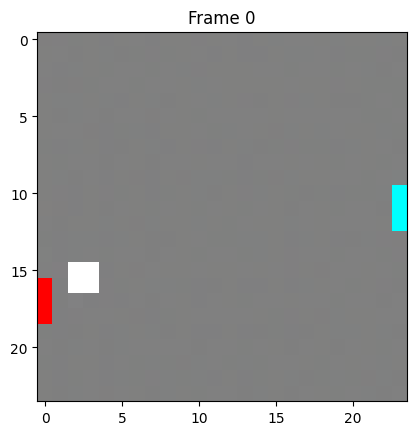

In [ ]:
actions = t.tensor([[0]+119*[2]], dtype=t.int32, device=model.device)
negative_actions = t.tensor([[0]+29*[2]], dtype=t.int32, device=model.device)
z = render_video(actions, n_steps=10, cfg=0, negative_actions=None, clamp=True)
frames = pred2frame(z)

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# z[0] shape: (num_frames, height, width, 3), where num_frames = frames.shape[1]
frames_np = frames[0].permute(0, 2, 3, 1).cpu().numpy()  # shape: (num_frames, height, width, 3)

fig, ax = plt.subplots()
im = ax.imshow(frames_np[0])
ax.set_title('Frame 0')

def animate(i):
    im.set_data(frames_np[i])
    ax.set_title(f'Frame {i}')
    return [im]

ani = animation.FuncAnimation(
    fig, animate, frames=frames_np.shape[0],
    interval=200, blit=True, repeat=True
)

plt.show()

# Optional: To save the gif uncomment below (requires pillow, install with `pip install pillow`)
from collections import Counter
# Majority vote over values in actions for the filename
if actions is not None:
    # Flatten actions tensor and convert to list
    action_vals = actions.flatten().tolist()
    majority_val = Counter(action_vals).most_common(1)[0][0]
    ani.save(f"sample_{majority_val}.gif", writer="pillow")
else:
    ani.save("sample_unknown.gif", writer="pillow")




In [ ]:
print(model.blocks[5].layer_idx)